https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators  
For what purpose was the dataset created?

* To better understand the relationship between  lifestyle and diabetes in the US

Who funded the creation of the dataset?

* The CDC

What do the instances in this dataset represent?

* Each row represents a person participating in this study.

Are there recommended data splits?

* Cross validation or a fixed train-test split could be used.

Does the dataset contain data that might be considered sensitive in any way?

- Gender
- Income
- Education level

Was there any data preprocessing performed?

* Bucketing of age

Additional Information

* Dataset link: https://www.cdc.gov/brfss/annual_data/annual_2014.html

Has Missing Values?

* No  

diabetes _ binary _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is not balanced.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import multiprocessing

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import F1Score, Recall, AUC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

## Phase 1: Data Analysis and Preparation  

* Once you have found a dataset you like
* load the data in a Python Notebook
* normalize your data. CANNOT DO THIS UNTIL DATA IS SPLIT.
* In your report’s introduction section please discuss:
    - why you chose to work on this project
    - explain the problem you plan to solve.
    - mention the source of your dataset.

        
* visualize/plot the distributions of each input feature and discuss the range of the values (min, max, mean, median, etc.). For example, plot histograms showing distribution of each input features. Selected visualizations should be included in the report.

* Discuss the distribution of the output labels.
* Check if the data is imbalanced by calculating what percentage of the output labels are 0 and what percentage are 1. If your dataset is heavily imbalanced (for example, 1% vs 99%) it may be a better idea to choose a different dataset. 

In [2]:
df_full = pd.read_csv("diabetes.csv")

In [3]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
df_full.head(3).transpose()

,0,1,2
Diabetes_binary,0.0,0.0,0.0
HighBP,1.0,0.0,1.0
HighChol,1.0,0.0,1.0
CholCheck,1.0,0.0,1.0
BMI,40.0,25.0,28.0
Smoker,1.0,1.0,0.0
Stroke,0.0,0.0,0.0
HeartDiseaseorAttack,0.0,0.0,0.0
PhysActivity,0.0,1.0,0.0
Fruits,0.0,0.0,1.0


In [5]:
df_full.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [6]:
df_full.Diabetes_binary.value_counts(normalize=True).round(2)

Diabetes_binary
0.0    0.86
1.0    0.14
Name: proportion, dtype: float64

In [7]:
df_full.Diabetes_binary.value_counts()

Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

In [8]:
cats = list(df_full.describe().transpose().loc[df_full.describe().transpose()['max']==1.0].transpose().columns)

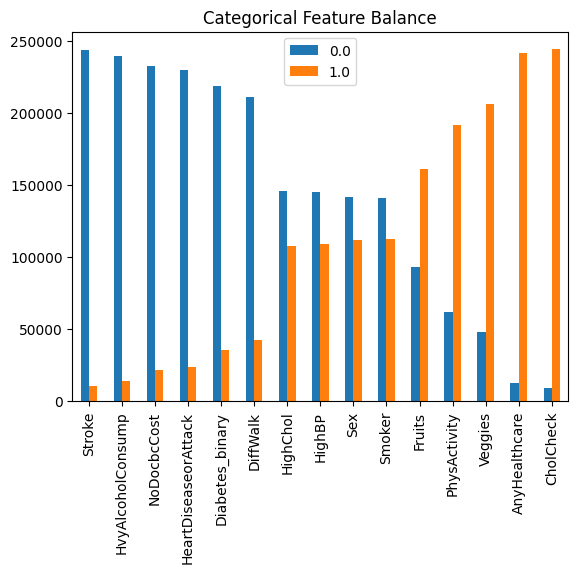

In [9]:
df_full.apply(pd.Series.value_counts).iloc[0:2,:].loc[:,cats].transpose().dropna().astype(int).sort_values(by=1.0).plot(kind='bar')
plt.title("Categorical Feature Balance")
plt.show()

In [10]:
numeric_cols = list(df_full.drop(labels=cats, axis=1).columns)
numeric_cols

['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

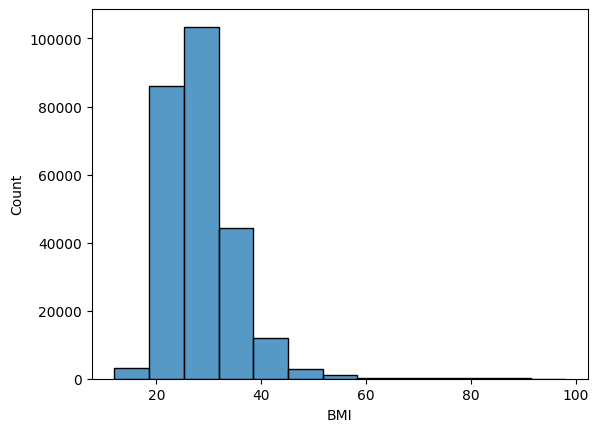

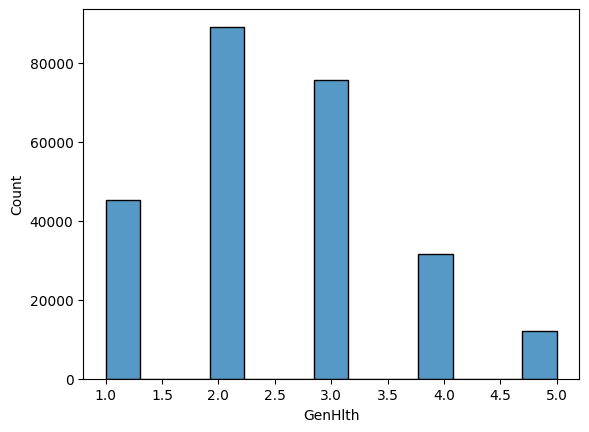

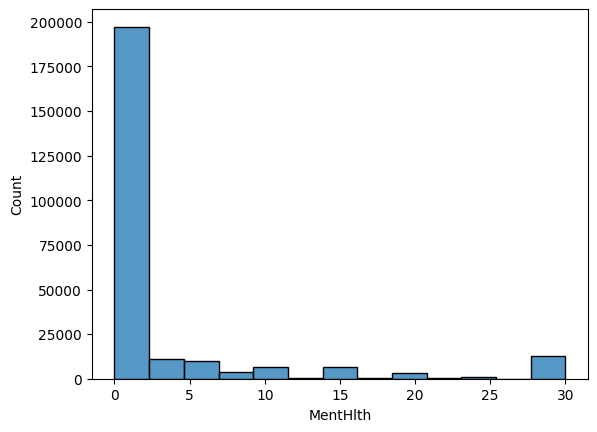

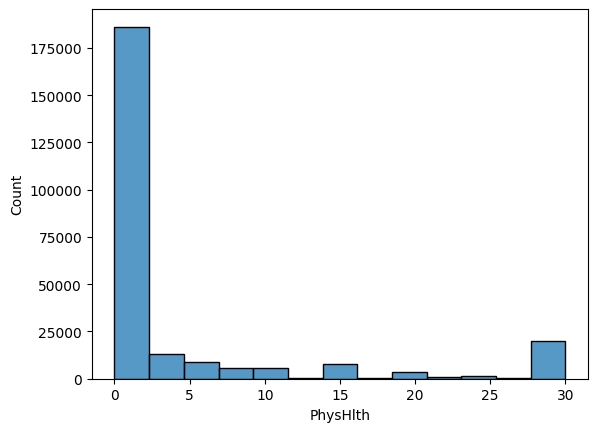

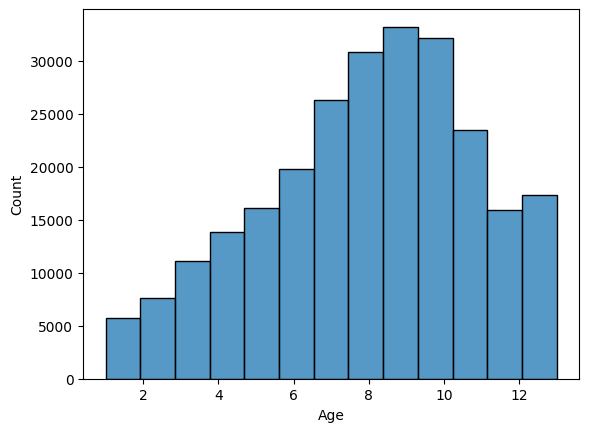

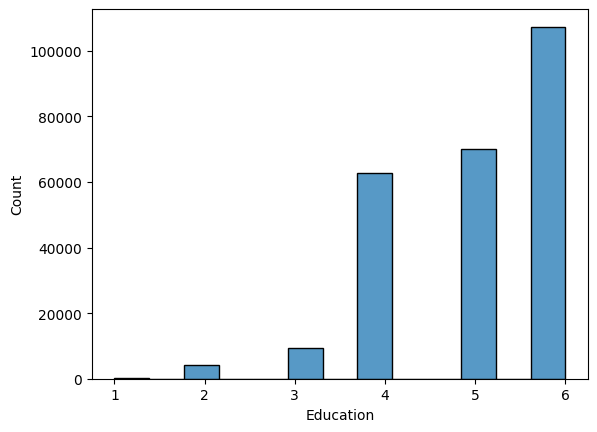

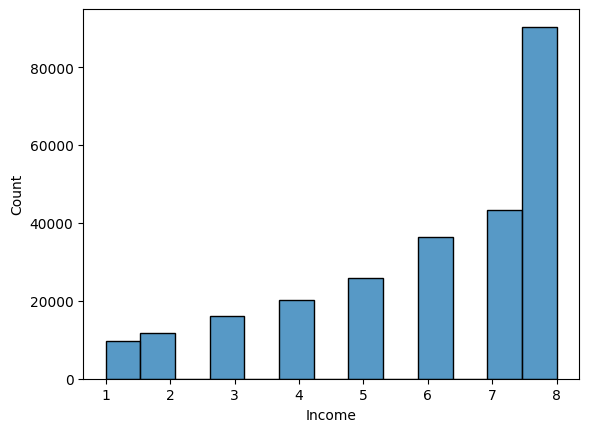

In [11]:
for column in numeric_cols:
    sns.histplot(data = df_full, x=column, bins=13)
    plt.show()


## Phase 2: Build a Model to Overfit the Entire Dataset

The main goal in this phase is to experiment and find what network size is needed to ‘overfit’ the entire dataset at your hand.  

* Do not split your data into training and validation.  

* The place to start is to use ‘logistic regression’ model and train for as many epochs as needed to obtain as high accuracy as possible. 
After training hundreds of epochs if you observe that the accuracy is not increasing then it implies that the number of neurons in your model (only one) may not be sufficient for overfitting.  

* The next step is to grow your model into a multi-layer model and add a few neurons (say only 2) in the input layer. This way your model will have ‘2 + 1 = 3’ neurons in total.
* If your accuracy still does not each a 100% or close to 100% you can continue to increase the number of layers and number of neurons.
* Once you have obtained 100% accuracy (or around 100%) your experiments for this phase are complete.

The results of this experiment also inform us that our final model (in subsequent phases) should be smaller than this model. 

### Stratify and subset data

In [12]:
mask_0 = df_full["Diabetes_binary"] == 0
mask_1 = df_full["Diabetes_binary"] == 1
df_0 = df_full.loc[mask_0].copy().sample(5000)
df_1 = df_full.loc[mask_1].copy().sample(5000)
df_s = pd.concat([df_0, df_1])
df_s = df_s.copy().sample(frac=1)
df_s.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,10000.0,0.5000,0.500025,0.0,0.0,0.5,1.0,1.0
HighBP,10000.0,0.5608,0.496314,0.0,0.0,1.0,1.0,1.0
HighChol,10000.0,0.5293,0.499166,0.0,0.0,1.0,1.0,1.0
CholCheck,10000.0,0.9728,0.162674,0.0,1.0,1.0,1.0,1.0
BMI,10000.0,29.8653,7.040107,13.0,25.0,29.0,33.0,92.0
Smoker,10000.0,0.4756,0.499429,0.0,0.0,0.0,1.0,1.0
Stroke,10000.0,0.0645,0.245654,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,10000.0,0.1524,0.359426,0.0,0.0,0.0,0.0,1.0
PhysActivity,10000.0,0.6972,0.459492,0.0,0.0,1.0,1.0,1.0
Fruits,10000.0,0.6182,0.485852,0.0,0.0,1.0,1.0,1.0


In [13]:
df_s.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
25237,0.0,0.0,1.0,1.0,31.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,4.0,8.0
149065,1.0,1.0,1.0,1.0,33.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,1.0,9.0,4.0,7.0
105856,1.0,0.0,0.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,5.0,0.0,0.0,10.0,4.0,7.0
208097,1.0,1.0,0.0,1.0,36.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0,2.0,5.0
230912,0.0,0.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,20.0,5.0,1.0,0.0,8.0,4.0,2.0


### Standardize Numeric Data and Prepare for Use in ML Models

In [ ]:
def robust_data_scaling(data):
    p_25, median, p_75 = data.quantile([.25, .5, .75])   
    return (data - median)/(p_75 - p_25)

In [ ]:
df = df_full.sample(frac=1)

In [ ]:
df_overfit = df.iloc[:2500, :].copy()

In [ ]:
for column in numeric_cols:
    df_overfit[column] = robust_data_scaling(df_overfit[column])

In [ ]:
df_overfit[numeric_cols].describe().transpose()

In [ ]:
X = df_overfit.drop(axis=1, labels='Diabetes_binary')
y = df_overfit['Diabetes_binary']

In [ ]:
callback_a = ModelCheckpoint(filepath = 'my_best_model.hdf5', monitor='loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=250, verbose=1)

In [ ]:
# https://jscommands.com/using-multiprocessing-with-keras-and-tensorflow-in-python/

In [ ]:
models = []
model = Sequential()
model.add(Dense(1, input_dim=X.shape[1], activation='sigmoid'))
models.append((model, X, y))

for i in range(4):
    model = Sequential()
    model.add(Dense(22, input_dim=X.shape[1], activation='relu'))
    for j in range(i):
        model.add(Dense(8, activation='relu'))
        
    model.add(Dense(1, activation='sigmoid'))
    models.append((model, X, y))

In [25]:
from funcs import train_model

In [ ]:
pool = multiprocessing.Pool()
history = pool.starmap(train_model, models)
pool.close()
pool.join()

In [ ]:
for i in range(len(history)):
    print(models[i][0].summary())
    pd.DataFrame(history[i].history).plot(figsize=(8,5))
    plt.ylim(-0.05,1.05)
    plt.show()

In [ ]:
model = Sequential()
model.add(Dense(1, input_dim=X.shape[1], activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['Recall', 'accuracy'])
model.summary()

In [ ]:
history = model.fit(x=X, y=y, epochs=1000, callbacks = [callback_a, callback_b])

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
#plt.grid(True)
plt.ylim(-0.05,1.05)
plt.show()

In [ ]:
y_pred_k = model.predict(X)
y_pred_kb = (y_pred_k >= 0.5)*1

# Plotting a Confusion Matrix with Sklearn
conf_matrix = confusion_matrix(y_true=y, y_pred=y_pred_kb)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
vis.plot()
plt.show()

In [ ]:
model = Sequential()
model.add(Dense(2, input_dim=X.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['Recall', 'accuracy'])
model.summary()

In [ ]:
history = model.fit(x=X, y=y, epochs=1000, callbacks = [callback_a, callback_b])

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
#plt.grid(True)
plt.ylim(-0.05,1.05)
plt.show()

In [ ]:
y_pred_k = model.predict(X)
y_pred_kb = (y_pred_k >= 0.5)*1

# Plotting a Confusion Matrix with Sklearn
conf_matrix = confusion_matrix(y_true=y, y_pred=y_pred_kb)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
vis.plot()
plt.show()

In [ ]:
model = Sequential()
model.add(Dense(2, input_dim=X.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['Recall', 'accuracy'])
model.summary()

In [ ]:
history = model.fit(x=X, y=y, epochs=1000, callbacks = [callback_a, callback_b])

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.ylim(-0.05,1.05)
plt.show()

In [ ]:
y_pred_k = model.predict(X)
y_pred_kb = (y_pred_k >= 0.5)*1

# Plotting a Confusion Matrix with Sklearn
conf_matrix = confusion_matrix(y_true=y, y_pred=y_pred_kb)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
vis.plot()
plt.show()

In [ ]:
model = Sequential()
model.add(Dense(4, input_dim=X.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['Recall', 'accuracy'])
model.summary()

In [ ]:
history = model.fit(x=X, y=y, epochs=1000, callbacks = [callback_a, callback_b])

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.ylim(-0.05,1.05)
plt.show()

In [ ]:
y_pred_k = model.predict(X)
y_pred_kb = (y_pred_k >= 0.5)*1

# Plotting a Confusion Matrix with Sklearn
conf_matrix = confusion_matrix(y_true=y, y_pred=y_pred_kb)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
vis.plot()
plt.show()

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim=X.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['Recall', 'accuracy'])
model.summary()

In [ ]:
history = model.fit(x=X, y=y, epochs=1000, callbacks = [callback_a, callback_b])

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.ylim(-0.05,1.05)
plt.show()

In [ ]:
y_pred_k = model.predict(X)
y_pred_kb = (y_pred_k >= 0.5)*1

# Plotting a Confusion Matrix with Sklearn
conf_matrix = confusion_matrix(y_true=y, y_pred=y_pred_kb)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
vis.plot()
plt.show()

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=X.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['Recall', 'accuracy'])
model.summary()

In [ ]:
history = model.fit(x=X, y=y, epochs=1000, callbacks = [callback_a, callback_b])

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.ylim(-0.05,1.05)
plt.show()

In [ ]:
y_pred_k = model.predict(X)
y_pred_kb = (y_pred_k >= 0.5)*1

# Plotting a Confusion Matrix with Sklearn
conf_matrix = confusion_matrix(y_true=y, y_pred=y_pred_kb)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
vis.plot()
plt.show()

In [ ]:
model = Sequential()
model.add(Dense(22, input_dim=X.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', 'Recall'])
model.summary()

In [ ]:
history = model.fit(x=X, y=y, epochs=1000, callbacks = [callback_a, callback_b])

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.ylim(-0.05,1.05)
plt.show()

In [ ]:
y_pred_k = model.predict(X)
y_pred_kb = (y_pred_k >= 0.5)*1

# Plotting a Confusion Matrix with Sklearn
conf_matrix = confusion_matrix(y_true=y, y_pred=y_pred_kb)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
vis.plot()
plt.show()

In [ ]:
model = Sequential()
model.add(Dense(22, input_dim=X.shape[1], activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', 'Recall'])
model.summary()

In [ ]:
history = model.fit(x=X, y=y, epochs=1000, callbacks = [callback_a, callback_b])

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.ylim(-0.05,1.05)
plt.show()

In [ ]:
y_pred_k = model.predict(X)
y_pred_kb = (y_pred_k >= 0.5)*1

# Plotting a Confusion Matrix with Sklearn
conf_matrix = confusion_matrix(y_true=y, y_pred=y_pred_kb)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
vis.plot()
plt.show()

In [ ]:
model = Sequential()
model.add(Dense(22, input_dim=X.shape[1], activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', 'Recall'])
model.summary()

In [ ]:
history = model.fit(x=X, y=y, epochs=1000, callbacks = [callback_a, callback_b])

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.ylim(-0.05,1.05)
plt.show()

In [ ]:
y_pred_k = model.predict(X)
y_pred_kb = (y_pred_k >= 0.5)*1

# Plotting a Confusion Matrix with Sklearn
conf_matrix = confusion_matrix(y_true=y, y_pred=y_pred_kb)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
vis.plot()
plt.show()

In [ ]:
model = Sequential()
model.add(Dense(22, input_dim=X.shape[1], activation='relu'))
model.add(Dense(22, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', 'Recall'])
model.summary()

In [ ]:
history = model.fit(x=X, y=y, epochs=1000, callbacks = [callback_a, callback_b])

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.ylim(-0.05,1.05)
plt.show()

In [ ]:
y_pred_k = model.predict(X)
y_pred_kb = (y_pred_k >= 0.5)*1

# Plotting a Confusion Matrix with Sklearn
conf_matrix = confusion_matrix(y_true=y, y_pred=y_pred_kb)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
vis.plot()
plt.show()

## Phase 3: Model Selection and Evaluation


The main goal in this phase is to obtain highest possible accuracy on the validation set after splitting your data into training set and validation set.  
* Please shuffle your rows before splitting.
* As your baseline model, i.e., the model with minimum accuracy, you can test the accuracy on the validation set using a ‘logistic regression’ model.
* Gradually grow your model into a multi-layered model and investigate if larger models deliver higher accuracy on the validation set.
    * As you explore various network architectures, please note the accuracies of these models to include in your report.
    * You can summarize your findings in the form of a table and the table should contain the accuracy and loss on the training set and the validation set (see below).
    * You can also include other parameters such as number of epochs, number of neurons, total number of parameters, etc.
 * Remember to select one model as your best performing model, i.e., the model that delivers highest accuracy on the validation set.
 * Your report should also include learning curves of your experiments.
 * You should also evaluate your models using other metrics besides precision; for example recall, precision, and F1 score.
 * Please note that your submission for this phase is ineligible for points if you do not use “model checkpointing” in your code.
 * You are discouraged to use external library methods such as “from sklearn.model_selection import train_test_split”.



[FOR GRADUATE STUDENTS ONLY] 

* discuss what architecture (how big) you do need to overfit when you have output as additional input feature,
* code a function that represents your model.
    * Once you have finished coding your model, please build your own function/method that serves as a prediction model.
    * Afterwards, please verify that predictions you obtain are same as the one you obtained using your trained model.

In [ ]:
# shuffle rows
df = df.sample(frac=1)

In [ ]:
df.shape

In [14]:
# split our data
df_train = df_s.iloc[:9000, :]
df_test = df_s.iloc[9000:10000, :]

In [15]:
X_train = df_train.drop(axis=1, labels='Diabetes_binary')
y_train = df_train['Diabetes_binary']
X_test = df_test.drop(axis=1, labels='Diabetes_binary')
y_test = df_test['Diabetes_binary']

In [16]:
# Create a transformer from the training data and use it to res-scale the training and test data

In [17]:
transform_dict = {}

for column in numeric_cols:
    transform_dict[column] = X_train[column].quantile([.25, .5, .75]).values

In [18]:
transform_dict

{'BMI': array([25., 29., 33.]),
 'GenHlth': array([2., 3., 4.]),
 'MentHlth': array([0., 0., 2.]),
 'PhysHlth': array([0., 0., 5.]),
 'Age': array([ 7.,  9., 11.]),
 'Education': array([4., 5., 6.]),
 'Income': array([4., 6., 8.])}

In [19]:
def robust_data_scaling_2(data, p_25, median, p_75):  
    return (data - median)/(p_75 - p_25)

In [20]:
for column in numeric_cols:
    X_train[column] = robust_data_scaling_2(X_train[column], 
                                            transform_dict[column][0], 
                                            transform_dict[column][1], 
                                            transform_dict[column][2])

In [21]:
for column in numeric_cols:
    X_test[column] = robust_data_scaling_2(X_test[column], 
                                            transform_dict[column][0], 
                                            transform_dict[column][1], 
                                            transform_dict[column][2])

In [22]:
# Verify
X_train[numeric_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BMI,9000.0,0.105903,0.875660,-2.00,-0.5,0.0,0.5,7.875
GenHlth,9000.0,-0.091500,0.556747,-1.00,-0.5,0.0,0.5,1.000
MentHlth,9000.0,1.782222,3.964690,0.00,0.0,0.0,1.0,15.000
PhysHlth,9000.0,1.114044,1.960483,0.00,0.0,0.0,1.0,6.000
Age,9000.0,-0.104667,0.720276,-2.00,-0.5,0.0,0.5,1.000
Education,9000.0,-0.036944,0.514212,-2.00,-0.5,0.0,0.5,0.500
Income,9000.0,-0.078972,0.540984,-1.25,-0.5,0.0,0.5,0.500


In [23]:
models = []
model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))
models.append((model, X_train, y_train))

model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
models.append((model, X_train, y_train))

for i in range(4):
    model = Sequential()
    model.add(Dense(22, input_dim=X_train.shape[1], activation='relu'))
    for j in range(i):
        model.add(Dense(22-4*j, activation='relu'))
        
    model.add(Dense(1, activation='sigmoid'))
    models.append((model, X_train, y_train))

In [26]:
pool = multiprocessing.Pool()
history = pool.starmap(train_model, models)
pool.close()
pool.join()

Epoch 1/10000
Epoch 1/10000
Epoch 1/10000
Epoch 1/10000
Epoch 1/10000
Epoch 1/10000
282/282 [==============================] - 0s 778us/step - loss: 0.7365 - recall: 0.6724 - accuracy: 0.6140 - auc: 0.6466
Epoch 2/10000
282/282 [==============================] - 0s 836us/step - loss: 0.6473 - recall: 0.5732 - accuracy: 0.6160 - auc: 0.6701
Epoch 2/10000
282/282 [==============================] - 0s 939us/step - loss: 0.5603 - recall: 0.7489 - accuracy: 0.7081 - auc: 0.7804
Epoch 2/10000
Epoch 2/10000
282/282 [==============================] - 1s 1ms/step - loss: 0.5701 - recall: 0.7849 - accuracy: 0.6980 - auc: 0.7743
Epoch 2/10000
282/282 [==============================] - 1s 1ms/step - loss: 0.5724 - recall: 0.7293 - accuracy: 0.7006 - auc: 0.7695
Epoch 2/10000
282/282 [==============================] - 0s 868us/step - loss: 0.5906 - recall: 0.7229 - accuracy: 0.6990 - auc: 0.7621
Epoch 3/10000
282/282 [==============================] - 0s 916us/step - loss: 0.5370 - recall: 0.7927 -

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 22        
                                                                 
Total params: 22 (88.00 Byte)
Trainable params: 22 (88.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


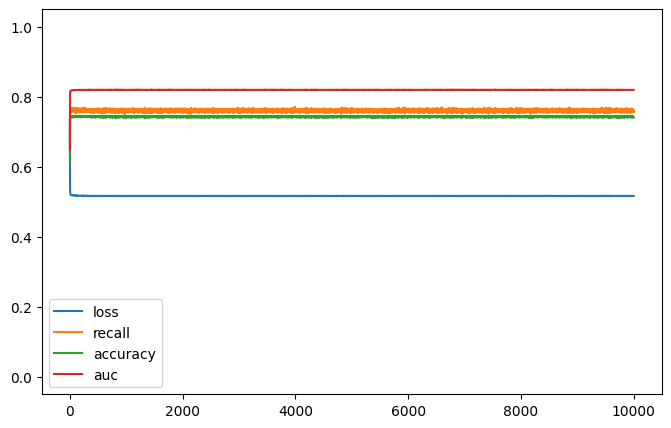

32/32 [==============================] - 0s 547us/step


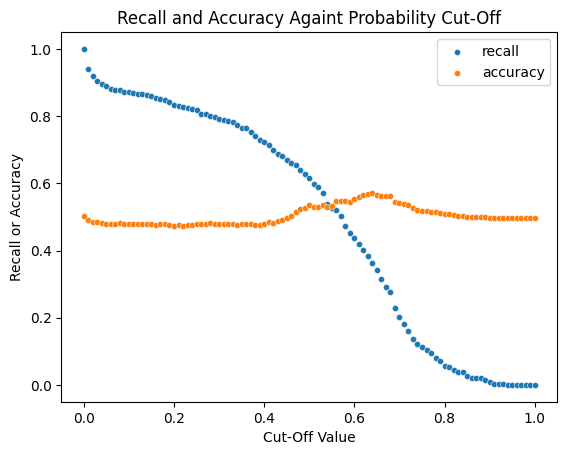

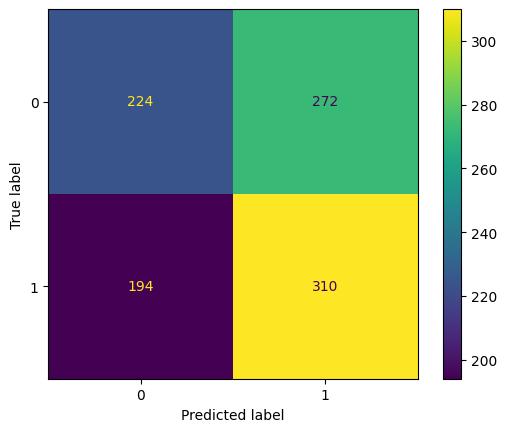

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 176       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 185 (740.00 Byte)
Trainable params: 185 (740.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


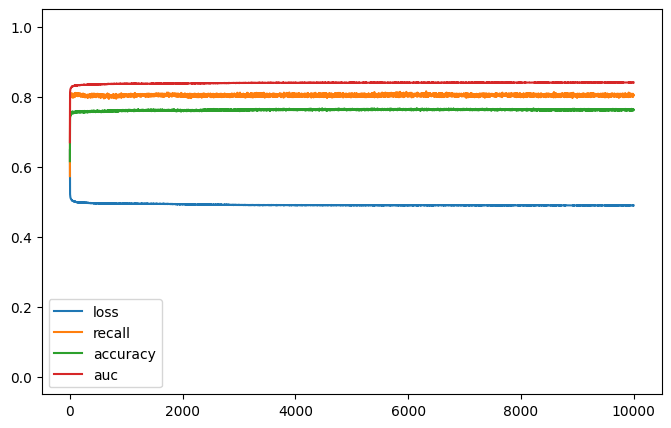

32/32 [==============================] - 0s 418us/step


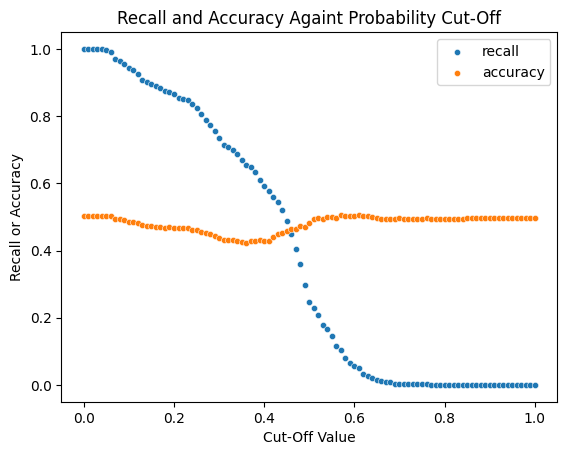

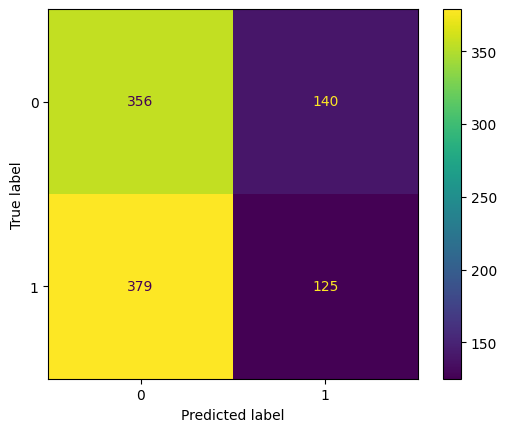

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 22)                484       
                                                                 
 dense_4 (Dense)             (None, 1)                 23        
                                                                 
Total params: 507 (1.98 KB)
Trainable params: 507 (1.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


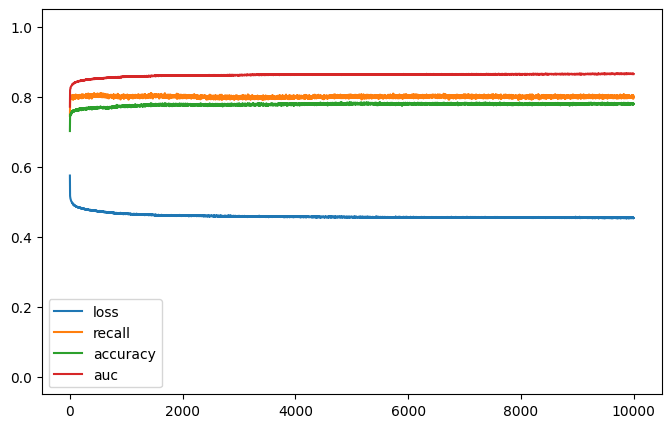

32/32 [==============================] - 0s 435us/step


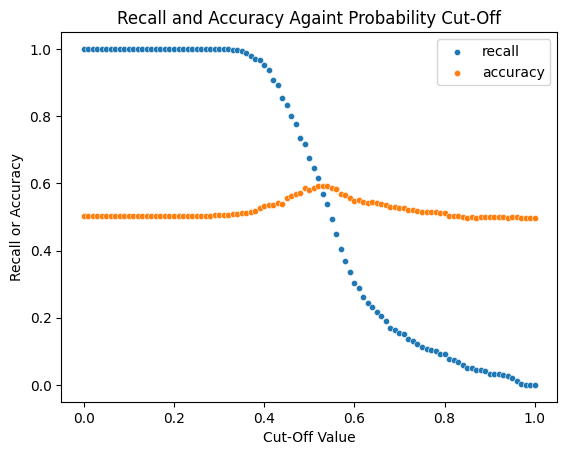

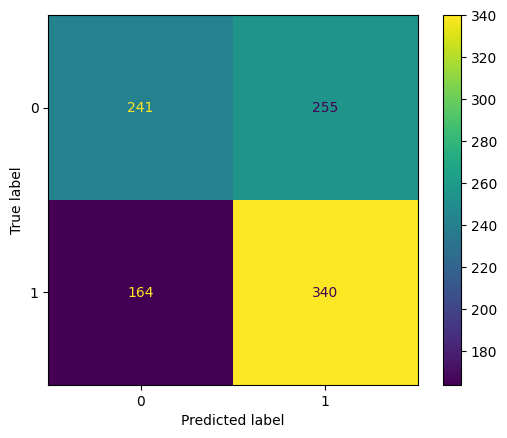

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 22)                484       
                                                                 
 dense_6 (Dense)             (None, 22)                506       
                                                                 
 dense_7 (Dense)             (None, 1)                 23        
                                                                 
Total params: 1013 (3.96 KB)
Trainable params: 1013 (3.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


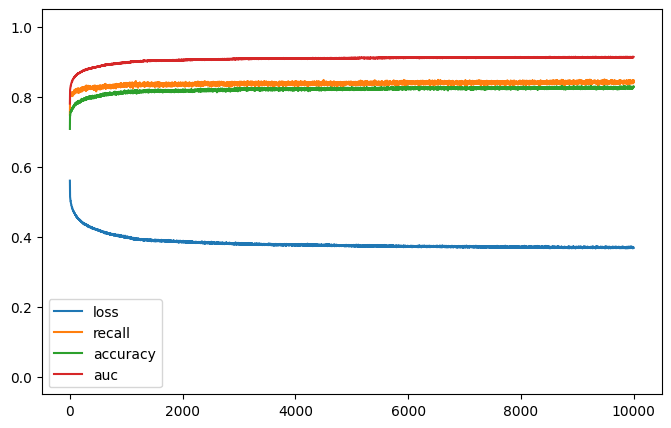

32/32 [==============================] - 0s 385us/step


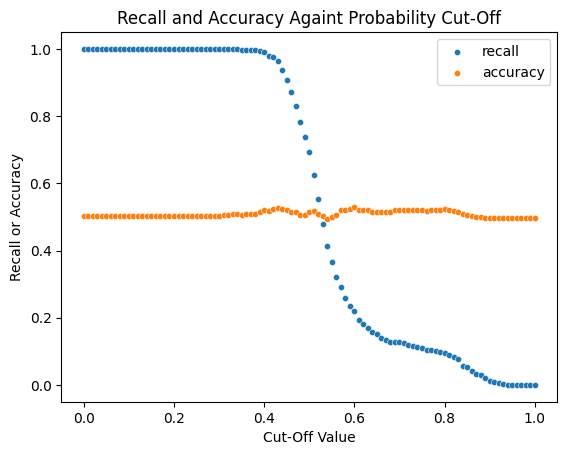

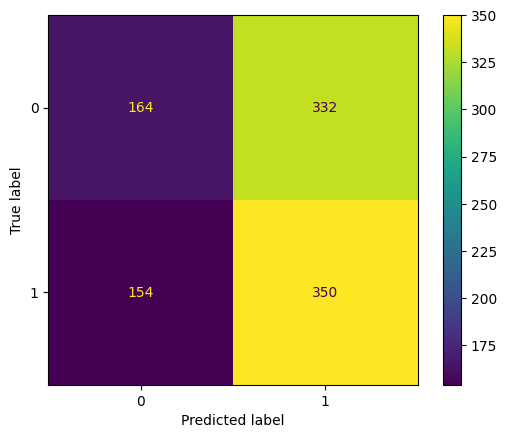

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 22)                484       
                                                                 
 dense_9 (Dense)             (None, 22)                506       
                                                                 
 dense_10 (Dense)            (None, 18)                414       
                                                                 
 dense_11 (Dense)            (None, 1)                 19        
                                                                 
Total params: 1423 (5.56 KB)
Trainable params: 1423 (5.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


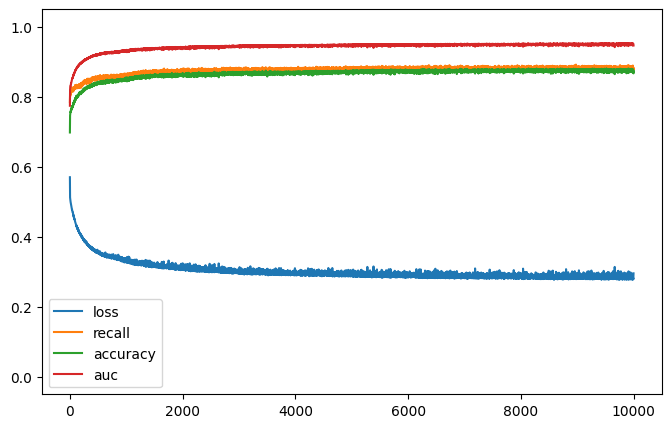

32/32 [==============================] - 0s 428us/step


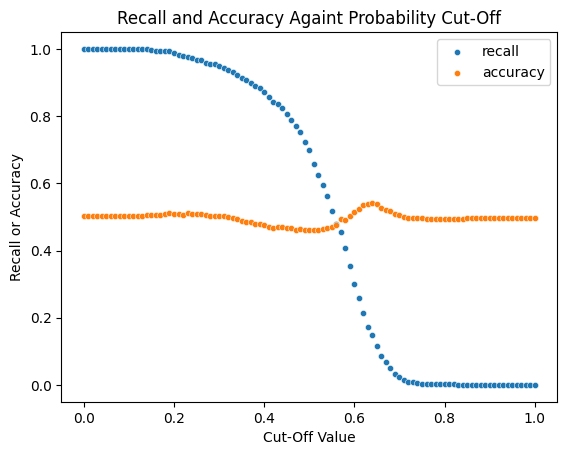

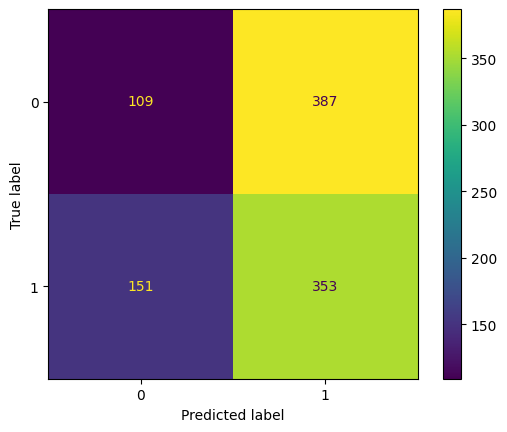

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 22)                484       
                                                                 
 dense_13 (Dense)            (None, 22)                506       
                                                                 
 dense_14 (Dense)            (None, 18)                414       
                                                                 
 dense_15 (Dense)            (None, 14)                266       
                                                                 
 dense_16 (Dense)            (None, 1)                 15        
                                                                 
Total params: 1685 (6.58 KB)
Trainable params: 1685 (6.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


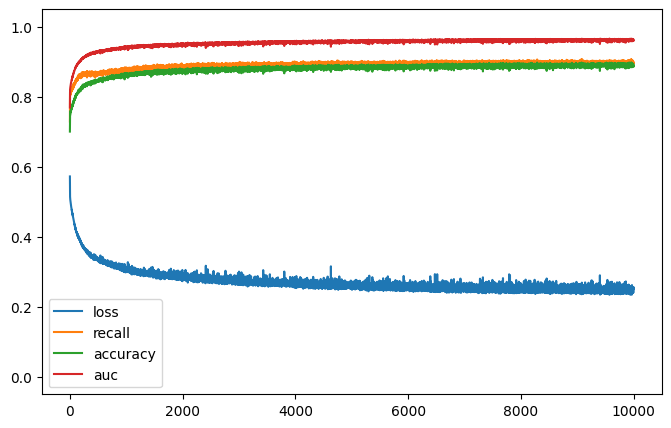

32/32 [==============================] - 0s 370us/step


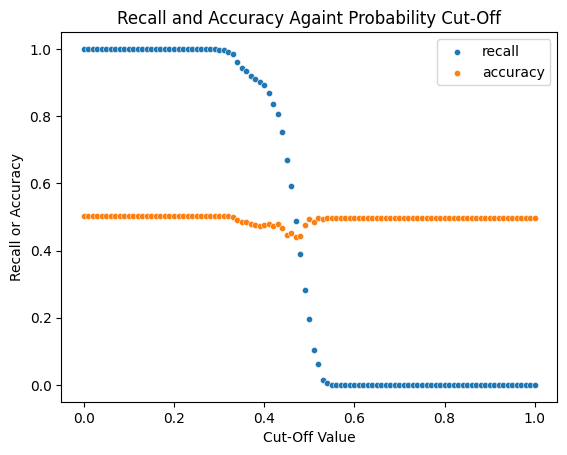

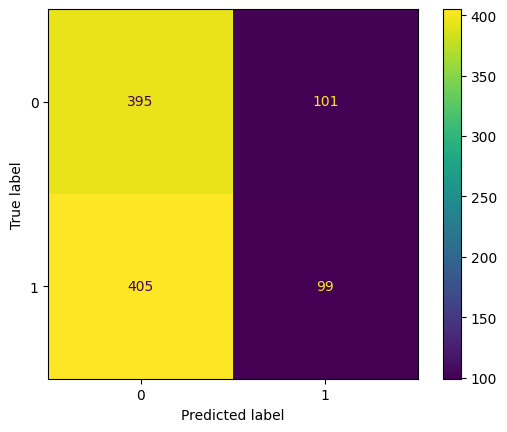

In [29]:
for i in range(len(history)):
    print(models[i][0].summary())
    pd.DataFrame(history[i].history).plot(figsize=(8,5))
    plt.ylim(-0.05,1.05)
    plt.show()
    
    y_pred_k = models[i][0].predict(X_test)
    x = np.arange(0,1.01,.01)
    recall = [recall_score(y_test, (y_pred_k >= i)*1) for i in x]
    accuracy = [accuracy_score(y_test, (y_pred_k >= i)*1) for i in x]
    sns.scatterplot(x=x, y=recall, label="recall", s=20)
    sns.scatterplot(x=x, y=accuracy, label="accuracy", s=20)
    plt.title("Recall and Accuracy Againt Probability Cut-Off")
    plt.ylabel("Recall or Accuracy")
    plt.xlabel("Cut-Off Value")
    plt.legend()
    plt.show()

    y_pred_kb = (y_pred_k >= 0.5)*1
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_kb)
    vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    vis.plot()
    plt.show()

In [41]:
y_pred_k = models[0][0].predict(df_full.drop(labels='Diabetes_binary', axis=1))

7928/7928 [==============================] - 2s 295us/step


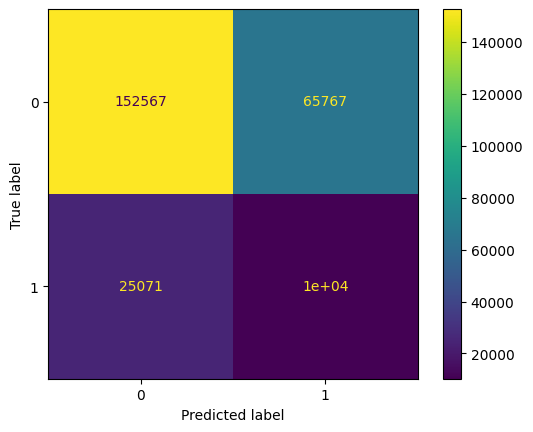

In [42]:
y_pred_kb = (y_pred_k >= 0.5)*1
conf_matrix = confusion_matrix(y_true=df_full['Diabetes_binary'], y_pred=y_pred_kb)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
vis.plot()
plt.show()

In [ ]:
y_pred_kb = (y_pred_k >= 0.529)*1
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_kb)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
vis.plot()
plt.show()

In [ ]:
# Build Model

In [ ]:
# Logistic Regression
model = Sequential()
model.add(Dense(1, input_dim=X.shape[1], activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['Recall', 'accuracy'])
model.summary()

In [ ]:
history = model.fit(x=X, y=y, epochs=1000, callbacks = [callback_a, callback_b])

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.ylim(-0.05,1.05)
plt.show()

In [ ]:
y_pred_k = model.predict(X_test)
x = np.arange(0,1.01,.01)
recall = [recall_score(y_test, (y_pred_k >= i)*1) for i in x]
accuracy = [accuracy_score(y_test, (y_pred_k >= i)*1) for i in x]
sns.scatterplot(x=x, y=recall, label="recall", s=20)
sns.scatterplot(x=x, y=accuracy, label="accuracy", s=20)
plt.title("Recall and Accuracy Againt Probability Cut-Off")
plt.ylabel("Recall or Accuracy")
plt.xlabel("Cut-Off Value")
plt.legend()
plt.show()

In [ ]:
y_pred_kb = (y_pred_k >= 0.5)*1
y_pred_k = model.predict(X)
y_pred_kb = (y_pred_k >= 0.5)*1

# Plotting a Confusion Matrix with Sklearn
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_kb)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
vis.plot()
plt.show()

In [ ]:
# One Hidden Layer

In [ ]:
model = Sequential()
model.add(Dense(22, input_dim=X.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', 'Recall'])
model.summary()

In [ ]:
history = model.fit(x=X, y=y, epochs=1000, callbacks = [callback_a, callback_b])

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.ylim(-0.05,1.05)
plt.show()

In [ ]:
y_pred_k = model.predict(X_test)
x = np.arange(0,1.01,.01)
recall = [recall_score(y_test, (y_pred_k >= i)*1) for i in x]
accuracy = [accuracy_score(y_test, (y_pred_k >= i)*1) for i in x]
sns.scatterplot(x=x, y=recall, label="recall", s=20)
sns.scatterplot(x=x, y=accuracy, label="accuracy", s=20)
plt.title("Recall and Accuracy Againt Probability Cut-Off")
plt.ylabel("Recall or Accuracy")
plt.xlabel("Cut-Off Value")
plt.legend()
plt.show()

In [ ]:
    y_pred_kb = (y_pred_k >= 0.5)*1
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_kb)
    vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    vis.plot()
    plt.show()

In [ ]:
# Two Hidden Layers

In [ ]:
model = Sequential()
model.add(Dense(22, input_dim=X.shape[1], activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', 'Recall'])
model.summary()

In [ ]:
history = model.fit(x=X, y=y, epochs=2500, callbacks = [callback_a, callback_b])

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.ylim(-0.05,1.05)
plt.show()

In [ ]:
y_pred_k = model.predict(X_test)
x = np.arange(0,1.01,.01)
recall = [recall_score(y_test, (y_pred_k >= i)*1) for i in x]
accuracy = [accuracy_score(y_test, (y_pred_k >= i)*1) for i in x]
sns.scatterplot(x=x, y=recall, label="recall", s=20)
sns.scatterplot(x=x, y=accuracy, label="accuracy", s=20)
plt.title("Recall and Accuracy Againt Probability Cut-Off")
plt.ylabel("Recall or Accuracy")
plt.xlabel("Cut-Off Value")
plt.legend()
plt.show()

In [ ]:
y_pred_kb = (y_pred_k >= 0.5)*1
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_kb)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
vis.plot()
plt.show()

## Phase 4: Feature Importance and Reduction  
The key activity in this phase is to study the importance of the input features by iteratively removing them. You must continue to use model checkpointing in this phase. Here are the steps involved:

* If you have 10 input features/columns, train 10 models where each model only receives one feature at a time.
    * For example, if age, BMI, and blood pressure are your only three input features, you train three models: one that only take age as input, another that only takes BMI as the input, and the last one that takes only blood pressure as the input.
    * The validation accuracy of these three models will indicate the relative importance of the three features.
    * You should plot these validation accuracies in the form of a bar diagram. If all your accuracies are more than 80%, your plot’s y-axis should be limited to 80-100.
* From the previous step you have the significance/important of each feature. The feature that yields the highest accuray is the most important feature.
    * Starting with the most unimportant feature, remove one feature at a time (without replacement) and train various models.
    * You can iteratively repeat the process removing more and more unimportant features. For example, if BMI is the most important feature and blood pressure is the least important one, you would train two models: one without blood pressure, and one without blood pressure and age.
    * Plot the validation dataset accuracy of all the models that you tested. The overall objective is to identify non-informative input features and remove them from the dataset.
* Finally, you can compare your feature-reduced model with the original model with all input features and discuss the difference in accuracy. 

For bonus points: Use model-agnostic methods such as LIME or Shapley values to derive feature importance. 
 
 https://christophm.github.io/interpretable-ml-book/

## Phase 5: Final Report  

* Please submit a PDF of your final report.
* 10/12 pages at most.
* Should include abstract and conclusion (each 250 words minimum).
* It should contain the important findings in each phase of your project.
* Your final/best model should be evaulated using ROC and AUC
* Your report should NOT include the results of your Phase II.
* Your tables and figures should be numbered and captioned (labelled) appropriately.
* Submit a link to your final Notebook. Optionally, you are welcome to host your project (and report) at Github (i.e., no extra points for hosting). .